In [1]:
%pip install face_recognition
%pip install dlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566164 sha256=03b8ed3747e7d6da9af59622f016a0640ab18dd114d575b0c3343b82131bd613
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
# Define the dictionary with employee names and their corresponding image file paths
employee_images = {
    "Hashim": "hashim.jpeg",
    "Sajith": "sajith.jpg"
}

# Import the necessary library
import face_recognition

known_face_encodings = []
known_face_names = []

# Loop through the employee_images dictionary and process each image
for employee_name, image_path in employee_images.items():
    # Load the image file
    image = face_recognition.load_image_file(image_path)

    # Use the HOG-based model (default) to find the face encodings in the image
    face_encoding = face_recognition.face_encodings(image)[0]

    # Append the face encoding and the corresponding employee name to the lists
    known_face_encodings.append(face_encoding)
    known_face_names.append(employee_name)

# Now you have known_face_encodings and known_face_names arrays ready to use


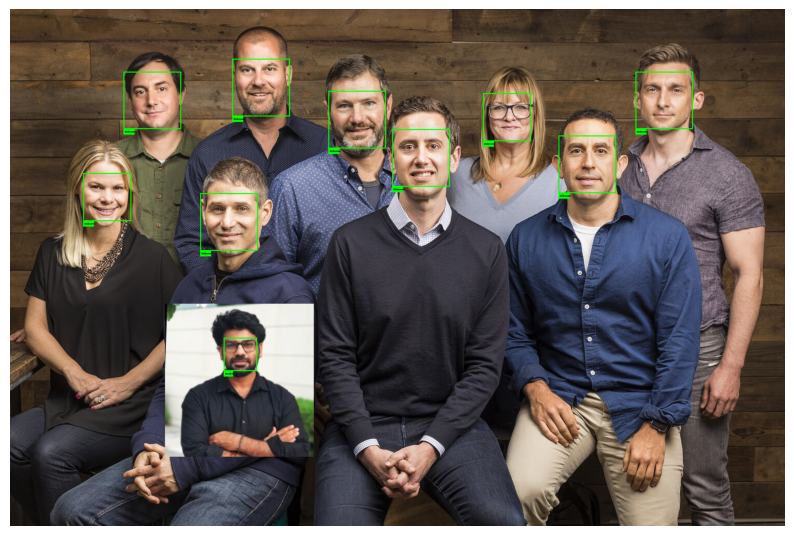

In [6]:
import numpy as np
import face_recognition
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

# Load the group image
group_image = face_recognition.load_image_file("grouppic-with.jpeg")

# Detect face locations and encodings in the group image
face_locations = face_recognition.face_locations(group_image)
face_encodings = face_recognition.face_encodings(group_image, face_locations)

# Convert the image to a PIL-format image so we can draw on it
pil_image = Image.fromarray(group_image)
draw = ImageDraw.Draw(pil_image)

# Load a font
font = ImageFont.load_default()

# Iterate over each detected face
for (top, right, bottom, left), face_encoding in zip(face_locations, face_encodings):
    # Check if the detected face matches any known face encodings
    matches = face_recognition.compare_faces(known_face_encodings, face_encoding)
    name = "Unknown"

    # Find the closest match
    face_distances = face_recognition.face_distance(known_face_encodings, face_encoding)
    best_match_index = np.argmin(face_distances)
    if matches[best_match_index]:
        name = known_face_names[best_match_index]

    # Draw a box around the face
    draw.rectangle(((left, top), (right, bottom)), outline=(0, 255, 0), width=4)

    # Calculate the text size using textbbox
    text_size = draw.textbbox((left, bottom), name, font=font)
    text_width = text_size[2] - text_size[0]
    text_height = text_size[3] - text_size[1]

    # Draw the name below the face
    draw.rectangle(((left, bottom), (left + text_width, bottom + text_height + 10)), fill=(0, 255, 0), outline=(0, 255, 0))
    draw.text((left + 6, bottom + 5), name, fill=(0, 0, 0, 255), font=font)

# Convert back to an array for display with matplotlib
image_to_display = np.array(pil_image)

# Display the resulting image using matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_to_display)
plt.axis('off')  # Turn off axis labels
plt.show()
